## Analiza wstępna

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
#Wczytanie zbioru z pliku CSV

filename = 'starbucks.csv'
data = pd.read_csv(filename, index_col='Unnamed: 0')

#### Podgląd zbioru

In [4]:
data.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [5]:
print(data.dtypes)

item         object
calories      int64
fat         float64
carb          int64
fiber         int64
protein       int64
type         object
dtype: object


In [6]:
data.describe()

,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


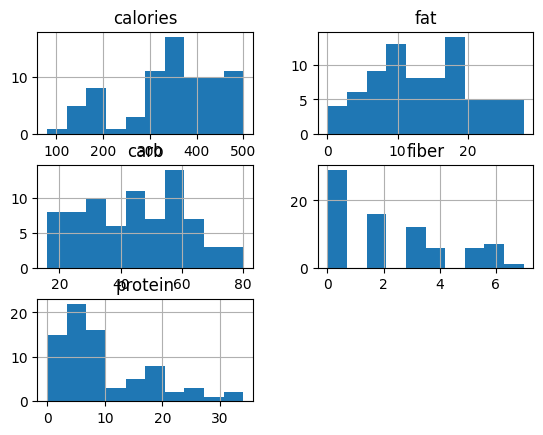

In [7]:
data.hist()
plt.show()

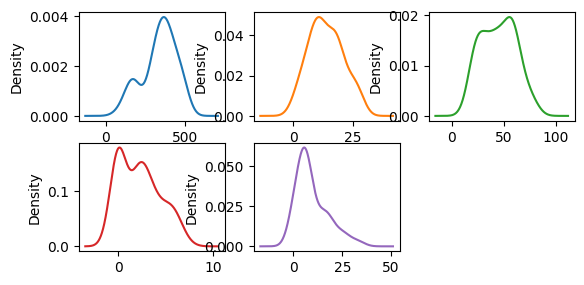

In [8]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=False)
plt.show()

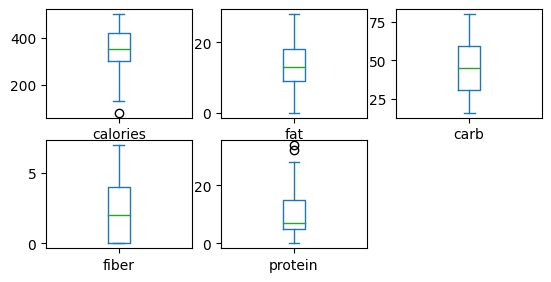

In [9]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False)
plt.show()

In [11]:
#kolumny numeryczne
columns=['calories', 'fat', 'carb', 'fiber', 'protein']

In [12]:
data[columns].corr()

,calories,fat,carb,fiber,protein
calories,1.000000,0.758682,0.674999,0.260645,0.410398
fat,0.758682,1.000000,0.144547,-0.028549,0.223470
carb,0.674999,0.144547,1.000000,0.213044,-0.050789
fiber,0.260645,-0.028549,0.213044,1.000000,0.488564
protein,0.410398,0.223470,-0.050789,0.488564,1.000000


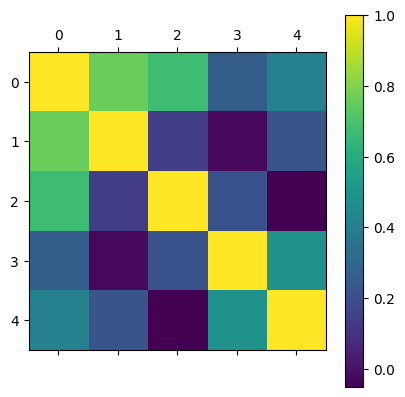

In [14]:
plt.matshow(data[columns].corr())
plt.colorbar()
plt.show()

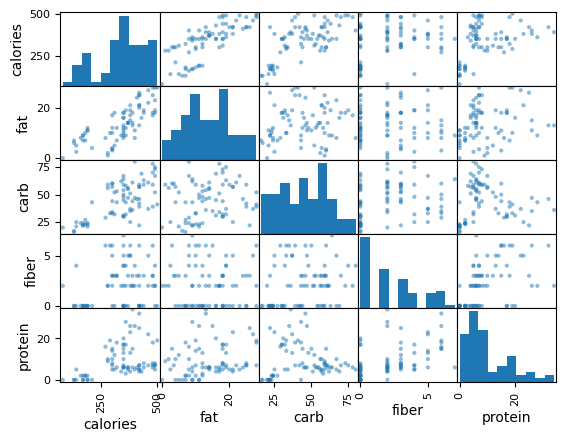

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

## Przygotowanie danych

### Skalowanie

In [31]:
X=data.values[:,1:6]
Y=data.values[:,6]

In [32]:
#skalowanie cech
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_rescaled=scaler.fit_transform(X)
print(X_rescaled[0:5,:])

[[0.64285714 0.28571429 0.796875   0.71428571 0.29411765]
 [0.64285714 0.32142857 0.75       1.         0.17647059]
 [0.80952381 0.71428571 0.671875   0.         0.14705882]
 [0.97619048 0.67857143 0.921875   0.57142857 0.20588235]
 [0.11904762 0.21428571 0.015625   0.         0.        ]]


In [33]:
#standaryzacja cech
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_rescaled=scaler.fit_transform(X)
print(X_rescaled[0:5,:])

[[ 0.10669269 -0.81799103  1.34578769  1.32406883  0.06471729]
 [ 0.10669269 -0.67613222  1.16334816  2.2769034  -0.43360587]
 [ 0.77538292  0.88431463  0.85928228 -1.05801761 -0.55818666]
 [ 1.44407315  0.74245582  1.8322931   0.84765154 -0.30902508]
 [-1.99490518 -1.10170864 -1.69487111 -1.05801761 -1.18109062]]


In [34]:
#normalizacja wektora cech dla danego przykładu
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X_rescaled=scaler.fit_transform(X)
print(X_rescaled[0:5,:])

[[0.98143615 0.02243283 0.18787492 0.01402052 0.02804103]
 [0.98304524 0.02527831 0.17975684 0.0196609  0.0168522 ]
 [0.98910911 0.04710043 0.13894628 0.         0.01177511]
 [0.98763228 0.03829595 0.15116821 0.0080623  0.01410903]
 [0.99052111 0.04571636 0.12952968 0.         0.        ]]


### Selekcja cech

In [35]:
#analiza statystyczna
from sklearn.feature_selection import chi2, SelectKBest

selector=SelectKBest(score_func=chi2, k=5)
test=selector.fit(X,Y)
print(test.scores_)
cechy=test.transform(X)
print(cechy[:,0:5])

[1115.24213661   52.80473496  241.12789847   56.40138711  408.59640365]
[[350 8.0 67 5 10]
 [350 9.0 64 7 6]
 [420 20.0 59 0 5]
 [490 19.0 75 4 7]
 [130 6.0 17 0 0]
 [370 14.0 47 5 6]
 [460 22.0 61 2 7]
 [370 14.0 55 0 6]
 [310 18.0 32 0 5]
 [420 25.0 39 0 7]
 [380 17.0 51 2 4]
 [320 12.0 53 3 6]
 [300 17.0 34 2 5]
 [420 21.0 57 2 5]
 [310 5.0 52 3 12]
 [480 18.0 70 3 7]
 [490 18.0 73 2 8]
 [410 24.0 46 3 6]
 [130 7.0 16 0 0]
 [280 2.0 56 2 10]
 [360 12.0 58 0 3]
 [490 23.0 67 0 5]
 [420 25.0 42 0 7]
 [440 18.0 59 3 8]
 [350 13.0 54 0 6]
 [210 4.0 43 0 0]
 [350 16.0 45 2 6]
 [300 3.0 60 6 15]
 [420 21.0 57 0 4]
 [370 14.0 56 3 5]
 [140 5.0 21 0 0]
 [280 1.0 59 2 9]
 [390 14.0 61 2 6]
 [480 17.0 78 2 6]
 [480 25.0 59 3 8]
 [430 16.0 69 0 4]
 [400 8.0 80 4 5]
 [340 9.0 62 2 4]
 [350 10.0 59 4 7]
 [440 19.0 63 0 6]
 [490 28.0 52 2 7]
 [480 28.0 39 6 18]
 [270 8.0 29 6 16]
 [360 19.0 32 4 17]
 [380 15.0 35 6 26]
 [380 19.0 37 5 13]
 [420 26.0 22 3 25]
 [350 11.0 50 6 15]
 [380 21.0 25 5 23

In [37]:
#Recursive Feature Extraction
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import pandas 
from pandas import read_csv
filename = 'starbucks.csv'
data = pd.read_csv(filename, index_col='Unnamed: 0')
X=data.values[:,1:6]
Y=data.values[:,6]
model=LogisticRegression(max_iter=int(1e6))
rfe=RFE(model, n_features_to_select=5)
test=rfe.fit(X,Y)

print("liczba cech: ", test.n_features_)
print("maska wybranych cech: ", test.support_)
print("ranking cech: ", test.ranking_)

liczba cech:  5
maska wybranych cech:  [ True  True  True  True  True]
ranking cech:  [1 1 1 1 1]


In [38]:
# redukcja wymiarowości
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
test=pca.fit(X)
print("komponenty: ", test.components_)
print("wyjaśniona wariancja: ", test.explained_variance_ratio_)
X_PCA=pca.fit_transform(X);
print(X)
print(X_PCA)

komponenty:  [[-9.92556929e-01 -5.03819054e-02 -1.06336195e-01 -5.20422686e-03
  -3.09505258e-02]
 [ 7.47238935e-02  2.49314488e-01 -9.09772915e-01  8.68500562e-04
   3.23374574e-01]
 [-2.35146990e-02 -4.55330805e-01  1.77903359e-01  1.63675758e-01
   8.56552134e-01]]
wyjaśniona wariancja:  [0.9801737  0.01522375 0.00426738]
[[350 8.0 67 5 10]
 [350 9.0 64 7 6]
 [420 20.0 59 0 5]
 [490 19.0 75 4 7]
 [130 6.0 17 0 0]
 [370 14.0 47 5 6]
 [460 22.0 61 2 7]
 [370 14.0 55 0 6]
 [310 18.0 32 0 5]
 [420 25.0 39 0 7]
 [380 17.0 51 2 4]
 [320 12.0 53 3 6]
 [300 17.0 34 2 5]
 [420 21.0 57 2 5]
 [310 5.0 52 3 12]
 [480 18.0 70 3 7]
 [490 18.0 73 2 8]
 [410 24.0 46 3 6]
 [130 7.0 16 0 0]
 [280 2.0 56 2 10]
 [360 12.0 58 0 3]
 [490 23.0 67 0 5]
 [420 25.0 42 0 7]
 [440 18.0 59 3 8]
 [350 13.0 54 0 6]
 [210 4.0 43 0 0]
 [350 16.0 45 2 6]
 [300 3.0 60 6 15]
 [420 21.0 57 0 4]
 [370 14.0 56 3 5]
 [140 5.0 21 0 0]
 [280 1.0 59 2 9]
 [390 14.0 61 2 6]
 [480 17.0 78 2 6]
 [480 25.0 59 3 8]
 [430 16.0 69 

In [39]:
# feature importance by decision tree
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
test=model.fit(X,Y)
print(test.feature_importances_)

[0.18914408 0.13432702 0.24648877 0.13517609 0.29486405]


### Testowanie modelu

In [56]:
#Holdout
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.30,
                                                 random_state=10)
model=LogisticRegression(max_iter=int(1e6))
model.fit(X_train, Y_train)
metryka=model.score(X_test, Y_test)
print("Dokładność: ",metryka)

Dokładność:  0.7083333333333334
